In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm, gamma, weibull_min, probplot

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# Load the tips dataset
tips = sns.load_dataset('tips')

In [4]:
# Compute the sample mean and standard deviation of the total bill amount
mean = tips['total_bill'].mean()
std = tips['total_bill'].std()
print("Mean:", mean)
print("Standard Deviation:", std)

Mean: 19.78594262295082
Standard Deviation: 8.902411954856856


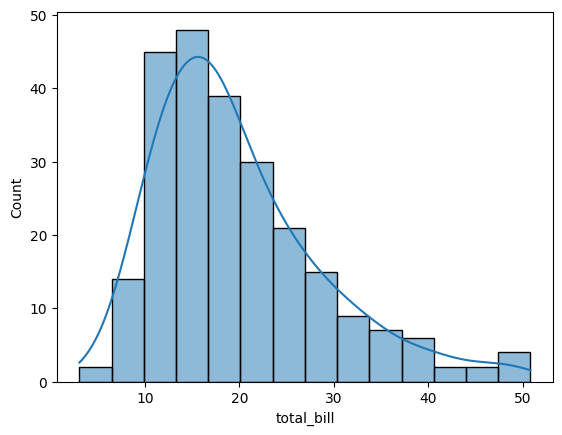

In [5]:
sns.histplot(tips['total_bill'], kde=True)
plt.show()

In [ ]:
# mean, std = norm.fit(tips['total_bill'])
# print("Mean:", mean)
# print("Standard Deviation:", std)

In [6]:
prob = norm.cdf(20, mean, std)
print("Probability of bill less than $20:", prob)

Probability of bill less than $20: 0.50959159276498


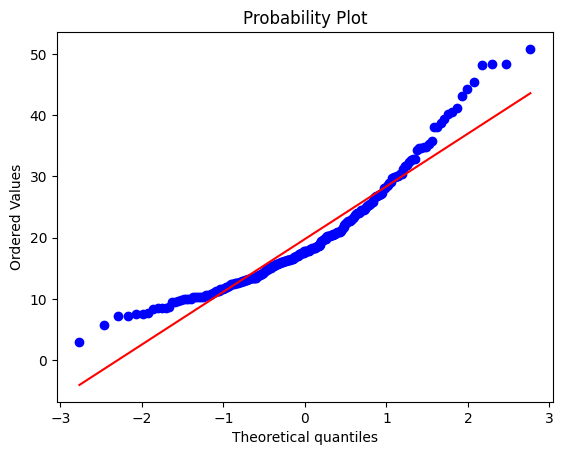

In [7]:
res = probplot(tips['total_bill'], plot=plt)
plt.show()

In [8]:
# Fit the lognormal distribution to the total bill amount
lognorm_shape, lognorm_loc, lognorm_scale = lognorm.fit(tips['total_bill'])

In [9]:
# Fit the gamma distribution to the total bill amount
gamma_shape, gamma_loc, gamma_scale = gamma.fit(tips['total_bill'])

In [10]:
# Fit the Weibull distribution to the total bill amount
weibull_shape, weibull_loc, weibull_scale = weibull_min.fit(tips['total_bill'])

In [11]:
# Calculate AIC for normal distribution
nll_normal = -norm.logpdf(tips['total_bill'], mean, std).sum()
aic_normal = 2 * (2 + 1) - 2 * nll_normal
print("AIC for normal distribution:", aic_normal)

AIC for normal distribution: -1752.36726034277


In [12]:
# Calculate AIC for lognormal distribution
nll_lognorm = -lognorm.logpdf(tips['total_bill'], lognorm_shape, lognorm_loc, lognorm_scale).sum()
aic_lognorm = 2 * (3 + 1) - 2 * nll_lognorm
print("AIC for lognormal distribution:", aic_lognorm)

AIC for lognormal distribution: -1691.0405904386262


In [13]:
# Calculate AIC for gamma distribution
nll_gamma = -gamma.logpdf(tips['total_bill'], gamma_shape, gamma_loc, gamma_scale).sum()
aic_gamma = 2 * (3 + 1) - 2 * nll_gamma
print("AIC for gamma distribution:", aic_gamma)

AIC for gamma distribution: -1694.974685431058


In [14]:
# Calculate AIC for Weibull distribution
nll_weibull = -weibull_min.logpdf(tips['total_bill'], weibull_shape, weibull_loc, weibull_scale).sum()
aic_weibull = 2 * (3 + 1) - 2 * nll_weibull
print("AIC for Weibull distribution:", aic_weibull)

AIC for Weibull distribution: -inf
